# Sentiment Analysis

https://github.com/fnielsen/afinn

https://nealcaren.org/lessons/wordlists/

Political sentiment: https://rstudio-pubs-static.s3.amazonaws.com/338458_3478e1d95ccf49bf90b30abdb4e3bd40.html#full_lexicon

In [53]:
import os
import sys
shared_path = '/Users/sarah/Downloads/TwitterResearch2020'
sys.path.append(shared_path)
import thinned_tweet_obj
import general_utilities
import gdrive_quickstart, io
from googleapiclient.http import MediaIoBaseDownload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
# Using Vader for sentiment analysis (looks at words in context)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [34]:
from afinn import Afinn
af = Afinn(language="en")

In [2]:
DRIVE = gdrive_quickstart.authenticate_drive_api()
file_objs_lst = gdrive_quickstart.get_file_objs_list(DRIVE, 'name contains "combined_tweets-2020"')

In [6]:
tweets_1101 = gdrive_quickstart.download_pkl_file(DRIVE, file_objs_lst[6], print_status=True)

Download 37%.
Download 74%.
Download 100%.


In [5]:
file_objs_lst[0:7]

{'id': '10a2Gc5WZhFaw9K4fOWlS2WDf-CPnnsri',
 'kind': 'drive#file',
 'mimeType': 'application/octet-stream',
 'name': 'combined_tweets-2020-11-01.pkl'}

In [38]:
texts = []
retweet_value = []
for i in range(100):
    obj = tweets_1101[i]
    text = obj.text
    if obj.retweet:
        text = obj.retweet.text
        retweet_value.append(1)
    else:
        retweet_value.append(0)
        
    texts.append(text)
        
#     print(text)
#     print(af.score(text))
#     print("*****************")
    
# left, blue, biden, harris
# realDonaldTrump, trump, GOP

In [42]:
# df_c = pd.concat([df_a.reset_index(drop=True), df_b], axis=1)
text_df = pd.concat([pd.DataFrame(texts), pd.DataFrame(retweet_value)], axis=1)
text_df.columns = ['text', 'retweet_value']
text_df.head()

,text,retweet_value
0,"In case you missed it ... \n#Minnesota, please...",0
1,You heard the woman! Get in the Sienna and bri...,1
2,Trump’s Impeachable Offenses:\n\n#76.) Trump i...,1
3,Arm up America! The storm is upon us. 🇺🇸,0
4,If the Trump years were merely a social engine...,1


In [47]:
pd.set_option('max_colwidth', 400)
text_df['afinn_score'] = text_df['text'].apply(af.score)
text_df.head(10)

,text,retweet_value,afinn_score
0,"In case you missed it ... \n#Minnesota, please vote carefully. #VOTE for #LibertyInsteadOfLiberals",0,1.0
1,You heard the woman! Get in the Sienna and bring snacks!,1,0.0
2,Trump’s Impeachable Offenses:\n\n#76.) Trump is inciting violence against Democratic members of Congress. His rally attendants chanting “SEND HER BACK!” about @IlhanMN is the most racist rhetoric seen by this group and it will lead to death threats.\nhttps://t.co/YyeCheqUGz,1,-12.0
3,Arm up America! The storm is upon us. 🇺🇸,0,0.0
4,"If the Trump years were merely a social engineering exercise to render the likely @DNC resisters into a war friendly horde, we know that @GravelInstitute and @marwilliamson will stand for peace. Who in elected office will do the same? @IlhanMN ? @AOC ? @VFPNational @WAMMwomen",1,2.0
5,"Welcome to Western Pennsylvania, @realDonaldTrump. Thanks for coming out to help #GOTV. https://t.co/aHVs1lMM1D https://t.co/EuSlTSmxdo",1,6.0
6,Since I was merely answering the @JoeBiden sign distribution ad from the @NassauDems I am tagging elected officials Bc they should know what’s happening in their backyard: @RepTomSuozzi @NassauExecutive @AnnaMKaplan @madelinesingas @JayJacobs28 @gina_sillitti @LurveyVeronica 6/ https://t.co/bP75TY7iyS,1,0.0
7,"Thanks but no thanks. \n\nEven though, unlike you and your family, I pass security clearance.\n\nAnd my appointment would mean an end to caging children, separating families, terrorizing immigrant communities and less cruelty from DHS.",1,0.0
8,"@RepGregSteube @Twitter @EpochTimes This has got to be one of the stupidest threads I’ve ever seen, starting with Greg the dumbass not knowing how Twitter works, and then throw in all his batshit crazy conspiracy theory followers peddling their own lies and you’ve got the republiQan party wrapped in a nice bow.",1,-5.0
9,This is the centrist @CaptMarkKelly (he likes dressing up like Hitler) with Ilhan Omar (probably worships Hitler),0,4.0


In [48]:
sentiment_vader = text_df['text'].apply(vader.polarity_scores)
sentiment_v_df = pd.DataFrame(sentiment_vader.tolist())
sentiment_v_df.head(10)

,compound,neg,neu,pos
0,0.1531,0.138,0.625,0.237
1,0.0000,0.000,1.000,0.000
2,-0.9577,0.345,0.655,0.000
3,0.0000,0.000,1.000,0.000
4,0.5171,0.073,0.790,0.136
5,0.8225,0.000,0.561,0.439
6,0.0000,0.000,1.000,0.000
7,-0.8878,0.278,0.618,0.104
8,-0.8779,0.236,0.681,0.083
9,0.7717,0.000,0.645,0.355


In [50]:
text_df['vader_compound'] = sentiment_v_df['compound']
text_df

,text,retweet_value,afinn_score,vader_compound
0,"In case you missed it ... \n#Minnesota, please vote carefully. #VOTE for #LibertyInsteadOfLiberals",0,1.0,0.1531
1,You heard the woman! Get in the Sienna and bring snacks!,1,0.0,0.0000
2,Trump’s Impeachable Offenses:\n\n#76.) Trump is inciting violence against Democratic members of Congress. His rally attendants chanting “SEND HER BACK!” about @IlhanMN is the most racist rhetoric seen by this group and it will lead to death threats.\nhttps://t.co/YyeCheqUGz,1,-12.0,-0.9577
3,Arm up America! The storm is upon us. 🇺🇸,0,0.0,0.0000
4,"If the Trump years were merely a social engineering exercise to render the likely @DNC resisters into a war friendly horde, we know that @GravelInstitute and @marwilliamson will stand for peace. Who in elected office will do the same? @IlhanMN ? @AOC ? @VFPNational @WAMMwomen",1,2.0,0.5171
5,"Welcome to Western Pennsylvania, @realDonaldTrump. Thanks for coming out to help #GOTV. https://t.co/aHVs1lMM1D https://t.co/EuSlTSmxdo",1,6.0,0.8225
6,Since I was merely answering the @JoeBiden sign distribution ad from the @NassauDems I am tagging elected officials Bc they should know what’s happening in their backyard: @RepTomSuozzi @NassauExecutive @AnnaMKaplan @madelinesingas @JayJacobs28 @gina_sillitti @LurveyVeronica 6/ https://t.co/bP75TY7iyS,1,0.0,0.0000
7,"Thanks but no thanks. \n\nEven though, unlike you and your family, I pass security clearance.\n\nAnd my appointment would mean an end to caging children, separating families, terrorizing immigrant communities and less cruelty from DHS.",1,0.0,-0.8878
8,"@RepGregSteube @Twitter @EpochTimes This has got to be one of the stupidest threads I’ve ever seen, starting with Greg the dumbass not knowing how Twitter works, and then throw in all his batshit crazy conspiracy theory followers peddling their own lies and you’ve got the republiQan party wrapped in a nice bow.",1,-5.0,-0.8779
9,This is the centrist @CaptMarkKelly (he likes dressing up like Hitler) with Ilhan Omar (probably worships Hitler),0,4.0,0.7717


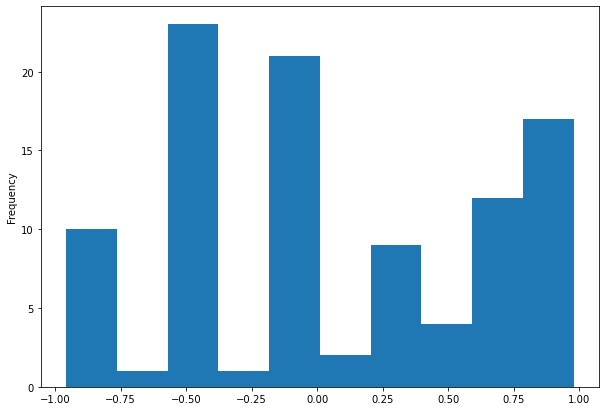

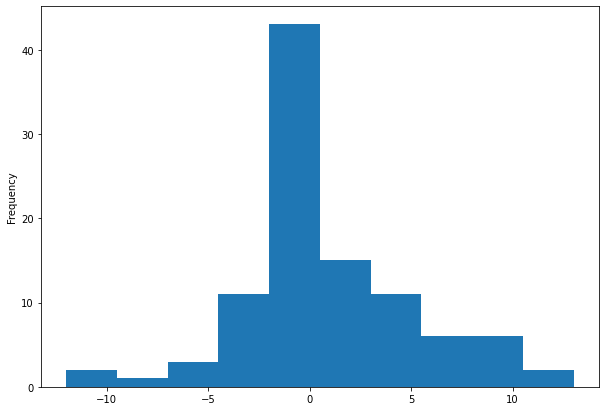

In [56]:
text_df.vader_compound.plot(kind='hist', figsize=(10, 7))
plt.show()
text_df.afinn_score.plot(kind='hist', figsize=(10, 7))
plt.show()

In [17]:
def sentiment_analysis(obj_lst):
    biden_lst = []
    trump_lst = []
    general_lst = []
    common_words = {}
    for obj in obj_lst:
        text = obj.text
        if obj.retweet:
            text = obj.retweet.text
            
        text = text.lower()
        sentiment_score = af.score(text)
        general_lst.append(sentiment_score)
        if "biden" in text:
            biden_lst.append(sentiment_score)
        if "trump" in text:
            trump_lst.append(sentiment_score)
        
        for word in af.find_all(text):
            if word in common_words:
                common_words[word] += 1
            else:
                common_words[word] = 1
                
    return biden_lst, trump_lst, general_lst, common_words

In [18]:
biden_s_1101, trump_s_1101, tweet_s_1101, common_words_1101 = sentiment_analysis(tweets_1101)

In [33]:
print(np.sum(np.array(tweet_s_1101) > 0))
print(np.sum(np.array(tweet_s_1101) == 0))
print(np.sum(np.array(tweet_s_1101) < 0))

# Add side by side barplot / countplot

101591
108844
93565


0.12411513157894737

In [19]:
def sort_freq_dict(freq_dict):
    return sorted(freq_dict.items(), key = lambda x: x[1], reverse = True)

In [20]:
sorted_cw_1101 = sort_freq_dict(common_words_1101)
sorted_cw_1101[0:100]

[('://', 145614),
 ('no', 17012),
 ('like', 15557),
 ('love', 6817),
 ('win', 6685),
 ('want', 6652),
 ('thank', 6615),
 ('great', 6599),
 ('good', 6150),
 ('stop', 5640),
 ('please', 5285),
 ('supporters', 5052),
 ('help', 4570),
 ('support', 4484),
 ('won', 3991),
 ('god', 3854),
 ('thanks', 3319),
 ('better', 3306),
 ('hard', 3304),
 ('big', 3255),
 ('best', 3204),
 ('fight', 2860),
 ('hope', 2846),
 ('care', 2724),
 ('yes', 2648),
 ('happy', 2536),
 ('gun', 2486),
 ('free', 2337),
 ('victory', 2310),
 ('join', 2302),
 ('violence', 2218),
 ('shit', 2115),
 ('hate', 2111),
 ('matter', 2026),
 ('xo', 1993),
 ('important', 1954),
 ('fake', 1933),
 ('bad', 1891),
 ('lost', 1882),
 ('united', 1851),
 ('true', 1833),
 ('wins', 1830),
 ('lol', 1823),
 ('wrong', 1816),
 ('interests', 1787),
 ('supreme', 1783),
 ('pileup', 1750),
 ('freedom', 1746),
 ('wow', 1712),
 ('shoot', 1709),
 ('justice', 1696),
 ('terrorist', 1694),
 ('top', 1655),
 ('racist', 1607),
 ('fuck', 1599),
 ('amazing', 159

## Afinn library

- POSITIVE if `score > 0`
- NEUTRAL if `score == 0`
- NEGATIVE if `score < 0`

`score(txt)` returns a sentiment score for the input string of text. 

`find_all(txt)` returns the words that matched the sentiment lexicon. `scores_with_pattern(txt)` returns the scores per each identified word.

In [13]:
# We might need to translate in case sentence is not in english
af.score(tweets_1101[0].text)
af.find_all(tweets_1101[0].text)

['missed', 'please', 'carefully']

In [18]:
# `scores_with_pattern` match scores to words identified in `find_all`
af.scores_with_pattern(tweets_1101[0].text)

[-2, 1, 2]

In [20]:
# df: text, score, postive words, negative words, is_retweet/num of retweets?

def get_positive_tweets(obj_lst):
    
    return df


def get_negative_tweets(obj_lst):
    
    return df

304000

SI indicator - sum of sentiment score per candidate